In [2]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

import random as rd

sns.set()

%precision 3
%matplotlib inline

/Users/jiheo/opt/anaconda3/envs/khu-ml/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

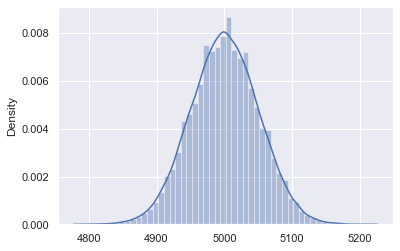

In [2]:
n_size = 10000
n_trial = 50000

coin = np.array([0,1])

count_coin = np.zeros(n_trial)

for i in range(n_trial):
    count_coin[i] = np.sum(
        np.random.choice(coin, size=n_size, replace=True)
    )

sns.distplot(count_coin)

## 정규분포와 응용

### 확률밀도

$$ N(x|\mu, \sigma^2) = \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

정규분포에서 주어진 값 x가 검출될 확률 

예. 직접 프로그래밍

```
x=3
mu=4
sigma=0.8

def norm(x,mu,sigma):
    return(1/np.sqrt(2*np.pi*sigma^2)*np.exp(-(x-mu)^2/2/sigma^2))
```

예. scipy 이용 
```
stats.norm.pdf(loc=mu,scale=sigma,x=x)
```

예. scipy + 객체 이용 
```
my_dist=stats.norm(loc=mu,scale=sigma)
my_dist.pdf(x=x)
```

예. x를 array로 넘겨 결과 받기
```
x=np.arange(1,7.1,0.1)
my_dist.pdf(x)
```


In [3]:
x = np.arange(-10, 10.1, 0.1)

In [4]:
normal_dist = stats.norm(loc=0, scale=1)

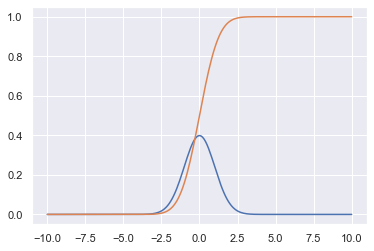

In [5]:
xx = np.arange(-10, 10.1, 0.1)

plt.plot(x, normal_dist.pdf(x=xx))
plt.plot(x, normal_dist.cdf(x=xx))

In [12]:
def norm_test(x, mu, sigma):
    return 1 / np.sqrt(2 * np.pi * sigma ** 2) * np.exp(-(x - mu) ** 2 / 2 / sigma ** 2)

In [15]:
norm_test(3,4,0.8)

0.22831135673627742

In [8]:
my_dist=stats.norm(loc=4, scale=0.8)

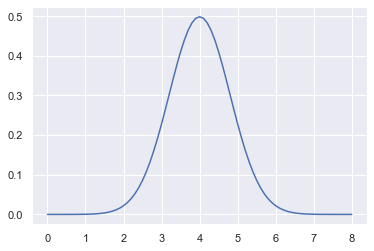

In [28]:
xx=np.arange(0,8.1,0.1)
plt.plot(xx,my_dist.pdf(xx))

In [30]:
my_dist.cdf(4)

0.5

### 누적확률분포 

$$ F(X) = P(X<= x) $$

$$ P(X<=x)=\int_{-\infty}^{x}  \frac{1}{\sqrt{2\pi \sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} dx $$

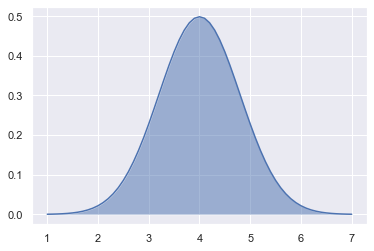

In [9]:
x = np.arange(1, 7.1, 0.1)
y = my_dist.pdf(x)
plt.plot(x,y)
plt.fill_between(x, 0, y, alpha=0.5)

In [10]:
def norm_pdf_cdf_plot(x, mu, sigma, xmin, xmax, by, plot=False):
    my_dist = stats.norm(loc=mu, scale=sigma)
    xx = np.arange(xmin, xmax,by)
    xxx = np.arange(xmin, x+by, by)
    
    yy = my_dist.pdf(xx)
    yyy = my_dist.pdf(xxx)
    
    if plot:
        plt.plot(xx,yy)
        plt.fill_between(xxx, 0, yyy, alpha=0.5)
    
    return [my_dist.pdf(x), my_dist.cdf(x)]

[0.2283113567362774, 0.10564977366685535]

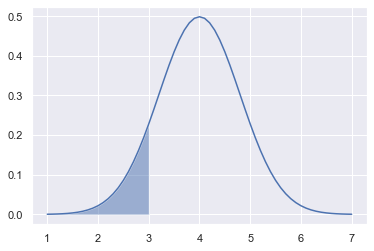

In [11]:
norm_pdf_cdf_plot(x=3, mu=4, sigma=0.8, xmin=1, xmax=7.1, by=0.1, plot=True)

### 하측확률과 퍼센트포인트

- 하측확률: 주어진 값까지의 누적확률
- 퍼센트포인트: 주어진 누적확률값을 갖게 될 확률변수 값 

In [43]:
my_dist=stats.norm(4.0,0.8)
my_dist.ppf(0.1056)

2.9997819550131375

In [44]:
my_dist=stats.norm(0,1)
my_dist.ppf(0.025)

-1.9599639845400545

### 표준정규분포 

https://ai-times.tistory.com/401 참조 
![정규분포표](http://cfs10.tistory.com/image/24/tistory/2009/10/11/18/50/4ad1aa4d9e9e0)

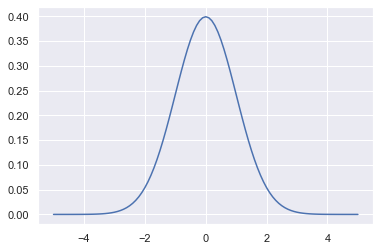

In [45]:
my_dist=stats.norm(0,1)
x=np.arange(-5,5.1,0.1)
plt.plot(x,my_dist.pdf(x))